In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity

%matplotlib inline

In [3]:
%run ../IBMCheck.ipynb

-- Ignoring SSL errors.  This is not recommended --
Credits: {'remaining': 15, 'promotional': 0, 'maxUserType': 15}


Backends loaded:
ibmq_qasm_simulator
ibmqx4
ibmqx2
ibmq_16_melbourne


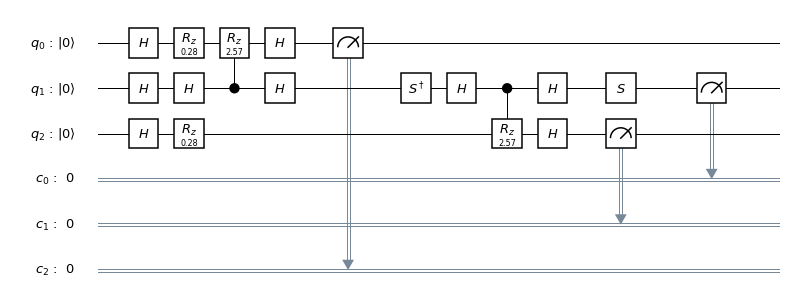

In [3]:
from math import pi
from numpy import arccos,sqrt

def basic_octa_circuit(numqubits,qubit,measdir,ancillas,directions,strenght):
    octa = QuantumCircuit(numqubits,len(ancillas)+1)
    octa.h(qubit)
    angle1=arccos(sqrt((1+strenght)/2))
    angle2=arccos(sqrt((1-strenght)/2))
    for i in range(len(directions)): 
        if directions[i]==2:
            octa.sdg(qubit)
        if directions[i]==1 or directions[i]==2:
            octa.h(qubit)   
        #octa.s(ancillas[i])          
        #octa.u3(2*angle1,0,0,ancillas[i])        
        #octa.cu3(2*(angle2-angle1),0,0,qubit,ancillas[i])
        #octa.sdg(ancillas[i])        

        #octa.rx(2*angle1,ancillas[i])
        #octa.cx(qubit,ancillas[i])
                
        octa.h(ancillas[i])
        octa.rz(2*angle1,ancillas[i])        
        #octa.crz(2*(angle2-angle1),qubit,ancillas[i])
        octa.crz(2*(pi/2-2*angle1),qubit,ancillas[i])
        octa.h(ancillas[i])         
        if directions[i]==1 or directions[i]==2:
            octa.h(qubit)
        if directions[i]==2:
            octa.s(qubit)
    if measdir==2:
        octa.sdg(qubit)
    if measdir==1 or measdir==2:
        octa.h(qubit)            
    octa.measure(ancillas+[qubit], [len(directions)-i for i in range(len(directions)+1)])   
    return octa
            
import collections

def eval_Platonic_counts(counts,threshold):
    avg={}
    total={}
    state={}
    for bits in counts:
        if not bits[:-1] in total:
            total[bits[:-1]]=0
            avg[bits[:-1]]=0
        total[bits[:-1]]+=counts[bits]   
        avg[bits[:-1]]+=(-2*int(bits[-1])+1)*counts[bits]
    for dir in total:
        if total[dir]>= threshold:
            state[dir]=avg[dir]/total[dir]
    return state
    #return collections.OrderedDict(sorted(state.items()))

circ=basic_octa_circuit(3,1,3,[0,2],[1,2],0.96)
circ.draw(output='mpl')

111
112
113
121
122
123
131
132
133
211
212
213
221
222
223
231
232
233
311
312
313
321
322
323
331
332
333


(-1.1, 1.1)

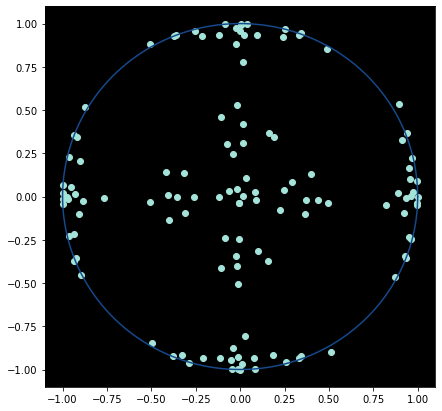

In [7]:
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.aer import QasmSimulator
simulator = Aer.get_backend('qasm_simulator')

simpoints=[]

for i in [1,2,3]:
    for j in [1,2,3]:
        for k in [1,2,3]:
            #circ=basic_octa_circuit(4,2,3,[0],[i],0.93)        
            #circ=basic_octa_circuit(4,2,3,[0,1],[i,j],0.93)
            circ=basic_octa_circuit(4,2,3,[0,1,3],[i,j,k],0.93)            
            zstate=eval_Platonic_counts(execute(circ, simulator,shots=8192).result().get_counts(circ),300)
            #circ=basic_octa_circuit(4,2,2,[0],[i],0.93)               
            #circ=basic_octa_circuit(4,2,2,[0,1],[i,j],0.93)         
            circ=basic_octa_circuit(4,2,2,[0,1,3],[i,j,k],0.93)
            ystate=eval_Platonic_counts(execute(circ, simulator,shots=8192).result().get_counts(circ),300)

            stateyz={}
            for dirs in zstate:
                if dirs in ystate:
                    stateyz[dirs]=[ystate[dirs],zstate[dirs]]
                    #stateyz[dirs]=[ystate[dirs]+np.random.normal(0, 0.1),zstate[dirs]+np.random.normal(0, 0.1)]
            simpoints+=stateyz.values()
        
            #print(str(i))
            #print(str(i)+str(j))            
            print(str(i)+str(j)+str(k))            

#print(simpoints)

from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

import numpy as np
from matplotlib import pyplot as plt
theta = np.arange(0, 2*np.pi , 0.004)
plt.plot(1 * np.cos(theta), 1 * np.sin(theta),color='#14498C')#'#A3E3D9'#'#14498C'
plt.scatter(*zip(*simpoints),color='#A3E3D9')#'#3ACC23'
axes = plt.gca()
axes.set_facecolor('xkcd:black')#'xkcd:salmon'
axes.set_xlim([-1.1,1.1])
axes.set_ylim([-1.1,1.1])

In [19]:
from qiskit.tools.monitor import job_monitor

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 0

points=[]

for i in [1,2,3]:
    #for j in [1,2,3]:
        #for k in [1,2,3]:        
            #circ=basic_octa_circuit(4,2,3,[0,1],[i,j],0.91)
            circ=basic_octa_circuit(4,1,3,[0],[i],0.93)            
            job_exp = execute(circ, hws["ibmqx4"], shots=shots, max_credits=max_credits)
            job_monitor(job_exp)
            zstate=eval_Platonic_counts(job_exp.result().get_counts(),300)
            #circ=basic_octa_circuit(4,2,2,[0,1],[i,j],0.91)
            circ=basic_octa_circuit(4,1,2,[0],[i],0.93)
            job_exp = execute(circ, hws["ibmqx4"], shots=shots, max_credits=max_credits)
            job_monitor(job_exp)            
            ystate=eval_Platonic_counts(job_exp.result().get_counts(),300)

            stateyz={}
            for dirs in zstate:
                if dirs in ystate:
                    stateyz[dirs]=[ystate[dirs],zstate[dirs]]
            points+=stateyz.values()
           # 
            print(str(i)+str(j))            
            #print(str(i))
            print(api.get_my_credits())

#print(points)

from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

import numpy as np
from matplotlib import pyplot as plt
theta = np.arange(0, 2*np.pi , 0.004)
plt.plot(1 * np.cos(theta), 1 * np.sin(theta),color='#14498C')#'#A3E3D9'#'#14498C'
plt.scatter(*zip(*points),color='#A3E3D9')#'#3ACC23'
axes = plt.gca()
axes.set_facecolor('xkcd:black')#'xkcd:salmon'
axes.set_xlim([-1.1,1.1])
axes.set_ylim([-1.1,1.1])

NameError: name 'hws' is not defined

(-1.1, 1.1)

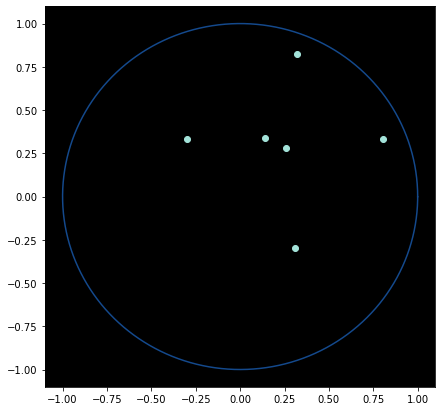

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

import numpy as np
from matplotlib import pyplot as plt
theta = np.arange(0, 2*np.pi , 0.004)
plt.plot(1 * np.cos(theta), 1 * np.sin(theta),color='#14498C')#'#A3E3D9'#'#14498C'
plt.scatter(*zip(*points),color='#A3E3D9')#'#3ACC23'
axes = plt.gca()
axes.set_facecolor('xkcd:black')#'xkcd:salmon'
axes.set_xlim([-1.1,1.1])
axes.set_ylim([-1.1,1.1])

In [7]:
angle1=0.2
angle2=0.5
qc = QuantumCircuit(2,1)
qc.h(0)
qc.s(0)
qc.u3(angle1,0,0,0)        
qc.cu3(angle2-angle1,0,0,1,0)
qc.sdg(0)
qc.h(0)
qc.rz(-angle1,0)
qc.crz(angle1-angle2,1,0)
qc.draw(output='mpl')
job = execute(qc,Aer.get_backend('unitary_simulator'))
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.921+0.389j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.921+0.389j],
       [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ]])

In [18]:
angle1=0.3
qc2 = QuantumCircuit(2,1)
qc2.rx(2*angle1,1)
qc2.cx(0,1)
qc2.s(1)
qc2.draw(output='mpl')
job = execute(qc2,Aer.get_backend('unitary_simulator'))
job.result().get_unitary(qc2, decimals=3)

array([[0.955+0.j   , 0.   +0.j   , 0.   -0.296j, 0.   +0.j   ],
       [0.   +0.j   , 0.   -0.296j, 0.   +0.j   , 0.955+0.j   ],
       [0.296+0.j   , 0.   +0.j   , 0.   +0.955j, 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.955j, 0.   +0.j   , 0.296+0.j   ]])